# Comparison CUTonalá and PVlib forecast using RAP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

In [2]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

In [3]:
cec_modules = pvlib.pvsystem.retrieve_sam('CECMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')

cec_module = cec_modules['Canadian_Solar_Inc__CS6X_320P']
cec_inverter = cec_inverters['INGETEAM_POWER_TECHNOLOGY_S_A___Ingecon_Sun_40TL_U_M__480V_']

In [4]:
#cec_module

In [5]:
#cec_inverter

In [6]:
latitude= 20.56
longitude= -103.22
altitude=1544
tz='America/Mexico_City'

In [7]:
location = Location(latitude=latitude, longitude=longitude, altitude=altitude, tz=tz)

In [8]:
surface_tilt = 25
surface_azimuth = 180 # pvlib uses 0=North, 90=East, 180=South, 270=West convention
albedo = 0.2

In [9]:
losses = pvlib.pvsystem.pvwatts_losses(soiling=5, age=2)
losses

18.371877653851264

In [10]:
system = PVSystem(surface_tilt=surface_tilt, surface_azimuth=surface_azimuth,
                 module_parameters=cec_module,
                 inverter_parameters=cec_inverter,
                 temperature_model_parameters=temperature_model_parameters,
                 albedo=albedo, surface_type=None, module=None, 
                 module_type='glass_polymer',
                 modules_per_string=19.5, 
                 strings_per_inverter=8, inverter=None, 
                 racking_model='open_rack', 
                 losses_parameters=dict(soiling=5, age=2), 
                 name='Name of PV system: Huerto de Cutonalá')

In [11]:
mc = ModelChain(system, location, name='Huerto de Cutonalá', 
                clearsky_model='ineichen', transposition_model='haydavies', 
                solar_position_method='nrel_numpy', airmass_model='kastenyoung1989',
                dc_model=None, #from module specifications
                ac_model='sandia', #from inverter specifications
                aoi_model='no_loss', 
                spectral_model='no_loss', #spectral model 'no loss' otherwise error
                temperature_model='sapm', losses_model='pvwatts')

In [12]:
import datetime
#Variables de tiempo

start = pd.Timestamp(datetime.date.today(), tz='America/Mexico_City') # today's date
end = start + pd.Timedelta(days=7) # 7 days from today

#start_variable stand for a configurable variable for one given date
#end_variable stand for a configurable variable for one given end date
#days_before_today variable stands for an especific date before today

days_before_today = 6

start_variable = start - pd.Timedelta(days=days_before_today)
end_variable = start_variable + pd.Timedelta(days=1)

In [13]:
start_variable

Timestamp('2021-02-27 00:00:00-0600', tz='America/Mexico_City')

In [14]:
end_variable

Timestamp('2021-02-28 00:00:00-0600', tz='America/Mexico_City')

## Variables for files

In [15]:
# study_day variable stands for what is the date of comparision between real data and forecasted
# study_variable must follow this format: DD
study_day = '27'
month = 'Febrero'
model_of_study = 'RAP'

cutonala_real_data_file = './Real Data Cutonalá/Febrero/2021-' + study_day + '-' + month + '.csv'
comparision_data_to_csv_date = './comparision data/Comparación Febrero/' + study_day + '-' + month + '-2021-' + model_of_study
metrics_data = './comparision data/Comparación Febrero/' + study_day + '-' + month + '-2021-'+ model_of_study +'-Metrics'

In [16]:
from pvlib.forecast import RAP

/Users/luisvargas/Desktop/Tesis Pvlib/env_pvlib_tesis/lib/python3.8/site-packages/pvlib/forecast.py:18: UserWarning: The forecast module algorithms and features are highly experimental. The API may change, the functionality may be consolidated into an io module, or the module may be separated into its own package.
  warnings.warn(


In [17]:
fm = RAP()

In [18]:
# Se obtiene la data y se procesa del modelo de pronostico
forecast_data = fm.get_processed_data(latitude, longitude, start_variable, end_variable)

In [19]:
#pd.set_option('display.max_columns', None)
forecast_data

,temp_air,wind_speed,ghi,dni,dhi,total_clouds,low_clouds,mid_clouds,high_clouds
2021-02-27 06:00:00-06:00,15.088928,1.653605,0.000000,0.000000,0.000000,28.0,0.0,0.0,28.0
2021-02-27 07:00:00-06:00,13.931091,1.514093,0.000000,0.000000,0.000000,13.0,0.0,0.0,13.0
2021-02-27 08:00:00-06:00,13.034485,1.606059,81.936056,118.108042,62.020420,16.0,0.0,0.0,16.0
2021-02-27 09:00:00-06:00,12.161285,1.609763,290.350128,376.355005,141.883109,20.0,0.0,0.0,20.0
2021-02-27 10:00:00-06:00,11.373474,1.557902,313.133937,81.032138,265.316685,68.0,0.0,0.0,68.0
2021-02-27 11:00:00-06:00,10.834686,1.692141,293.095763,20.919448,277.570673,93.0,0.0,0.0,93.0
2021-02-27 12:00:00-06:00,9.742828,1.619436,322.558615,19.718951,305.990219,96.0,0.0,0.0,96.0
2021-02-27 13:00:00-06:00,9.090668,1.833915,327.634112,18.661468,311.255174,98.0,0.0,0.0,98.0
2021-02-27 14:00:00-06:00,10.911621,1.660321,305.155213,16.545146,291.059316,100.0,0.0,0.0,100.0
2021-02-27 15:00:00-06:00,18.494598,1.394229,308.752749,22.763198,291.343068,92.0,0.0,0.0,92.0


In [20]:
ghi = forecast_data['ghi']
dni = forecast_data['dni']
dhi = forecast_data['dhi']
temp_air = forecast_data['temp_air']
wind_speed = forecast_data['wind_speed']
indexDF = forecast_data.index

In [21]:
weather = pd.DataFrame([dni, ghi, dhi, temp_air, wind_speed]).T

In [22]:
mc.run_model(weather)

ModelChain: 
  name: Huerto de Cutonalá
  orientation_strategy: None
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: cec
  ac_model: snlinverter
  aoi_model: no_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: pvwatts_losses

In [23]:
mc.dc

,i_sc,v_oc,i_mp,v_mp,p_mp,i_x,i_xx
2021-02-27 06:00:00-06:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
2021-02-27 07:00:00-06:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
2021-02-27 08:00:00-06:00,5.504882e+00,676.474789,5.191411e+00,586.519106,3730.162726,5.465183e+00,4.217170e+00
2021-02-27 09:00:00-06:00,1.998492e+01,695.742164,1.882522e+01,592.430657,13662.741223,1.983708e+01,1.471801e+01
2021-02-27 10:00:00-06:00,1.904826e+01,697.443715,1.794449e+01,595.182964,13084.038433,1.890695e+01,1.406361e+01
2021-02-27 11:00:00-06:00,1.726754e+01,698.451679,1.627472e+01,597.794386,11918.606002,1.713918e+01,1.282322e+01
2021-02-27 12:00:00-06:00,1.897922e+01,701.507134,1.789450e+01,599.236899,13136.459670,1.883751e+01,1.405125e+01
2021-02-27 13:00:00-06:00,1.926058e+01,703.437362,1.815494e+01,601.249078,13372.403457,1.911634e+01,1.423777e+01
2021-02-27 14:00:00-06:00,1.793395e+01,698.435737,1.690023e+01,597.197006,12364.325613,1.780065e+01,1.329013e+01
2021-02-27 15:00:00-06:00,1.826977e+01,679.546691,1.717313e+01,577.504169,12149.677646,1.813801e+01,1.342520e+01


In [24]:
forecast_dc = mc.dc.reset_index()
forecast_dc

,index,i_sc,v_oc,i_mp,v_mp,p_mp,i_x,i_xx
0,2021-02-27 06:00:00-06:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
1,2021-02-27 07:00:00-06:00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
2,2021-02-27 08:00:00-06:00,5.504882e+00,676.474789,5.191411e+00,586.519106,3730.162726,5.465183e+00,4.217170e+00
3,2021-02-27 09:00:00-06:00,1.998492e+01,695.742164,1.882522e+01,592.430657,13662.741223,1.983708e+01,1.471801e+01
4,2021-02-27 10:00:00-06:00,1.904826e+01,697.443715,1.794449e+01,595.182964,13084.038433,1.890695e+01,1.406361e+01
5,2021-02-27 11:00:00-06:00,1.726754e+01,698.451679,1.627472e+01,597.794386,11918.606002,1.713918e+01,1.282322e+01
6,2021-02-27 12:00:00-06:00,1.897922e+01,701.507134,1.789450e+01,599.236899,13136.459670,1.883751e+01,1.405125e+01
7,2021-02-27 13:00:00-06:00,1.926058e+01,703.437362,1.815494e+01,601.249078,13372.403457,1.911634e+01,1.423777e+01
8,2021-02-27 14:00:00-06:00,1.793395e+01,698.435737,1.690023e+01,597.197006,12364.325613,1.780065e+01,1.329013e+01
9,2021-02-27 15:00:00-06:00,1.826977e+01,679.546691,1.717313e+01,577.504169,12149.677646,1.813801e+01,1.342520e+01


In [25]:
droped_forecas_data = forecast_dc.drop([0,1,2,4,5,7,8,10,11,13,14,15,16,17,18])
time = droped_forecas_data['index'].reset_index()
time = time['index']
time

0   2021-02-27 09:00:00-06:00
1   2021-02-27 12:00:00-06:00
2   2021-02-27 15:00:00-06:00
3   2021-02-27 18:00:00-06:00
Name: index, dtype: datetime64[ns, America/Mexico_City]

In [26]:
power_forecasted = droped_forecas_data['p_mp']
power_forecasted = power_forecasted.reset_index()
power_forecasted = power_forecasted['p_mp']
power_forecasted

0    13662.741223
1    13136.459670
2    12149.677646
3     5893.257787
Name: p_mp, dtype: float64

## Retrieving real data

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
real_data_cut = pd.read_csv(cutonala_real_data_file)

In [28]:
real_data_cut

,SerialNumber,BoardId,DateTime,GId,Vac1,Vac2,Vac3,Iac1,Iac2,Iac3,Freq,Pac(W),Qac,CosPhi,Vdc1,Vdc2,Idc1,Idc2,Pdc1,Pdc2,PacGrid,Energy(kWh)
0,3.600160e+11,03M172129A80,27/02/2021 07:00,group1/device4,259.18,243.44,257.75,1.65,1.69,1.57,52.50,150.00,257.08,0.03,586.06,542.13,0.22,0.04,127.50,16.67,0,0.03
1,3.600160e+11,03M172129A80,27/02/2021 07:15,group1/device4,284.08,277.00,282.40,2.12,2.40,2.24,59.98,370.00,0.00,-0.27,679.27,624.90,0.37,0.20,248.00,123.00,0,0.12
2,3.600160e+11,03M172129A80,27/02/2021 07:30,group1/device4,284.30,277.38,282.86,2.45,2.71,2.62,60.01,1093.00,0.00,-0.40,739.23,695.57,0.92,0.62,679.67,430.00,0,0.40
3,3.600160e+11,03M172129A80,27/02/2021 07:45,group1/device4,284.33,277.75,283.33,3.56,3.85,4.06,59.99,2578.00,-0.33,-0.13,724.90,670.67,2.08,1.66,1512.33,1118.33,0,1.04
4,3.600160e+11,03M172129A80,27/02/2021 08:00,group1/device4,283.65,276.92,282.76,5.49,5.82,6.00,59.99,4476.00,-0.33,-0.07,757.07,727.03,3.41,2.66,2583.67,1936.33,0,2.16
5,3.600160e+11,03M172129A80,27/02/2021 08:15,group1/device4,283.24,276.55,282.34,8.15,8.47,8.74,60.00,6863.00,0.67,0.07,748.70,675.30,5.04,4.74,3769.67,3190.33,0,3.87
6,3.600160e+11,03M172129A80,27/02/2021 08:30,group1/device4,282.43,275.48,281.28,10.90,11.21,11.52,59.98,9215.33,1.00,0.00,740.57,693.47,6.62,6.40,4907.33,4439.67,0,6.18
7,3.600160e+11,03M172129A80,27/02/2021 08:45,group1/device4,281.57,274.69,280.41,14.03,14.32,14.68,59.99,11852.67,-0.33,-0.13,732.27,701.37,8.49,8.26,6216.67,5799.33,0,9.14
8,3.600160e+11,03M172129A80,27/02/2021 09:00,group1/device4,281.34,274.54,280.25,17.04,17.20,17.81,59.99,14379.33,-1.33,-0.13,718.93,691.23,10.45,10.23,7518.00,7074.00,0,12.74
9,3.600160e+11,03M172129A80,27/02/2021 09:15,group1/device4,281.19,274.05,280.03,19.84,19.95,20.67,59.98,16723.67,-1.33,0.07,708.83,680.43,12.34,12.13,8752.00,8254.00,0,16.92


In [29]:
droped_data_cut = real_data_cut.drop([0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,45,46,47,48,49])

In [30]:
droped_data_cut

,SerialNumber,BoardId,DateTime,GId,Vac1,Vac2,Vac3,Iac1,Iac2,Iac3,Freq,Pac(W),Qac,CosPhi,Vdc1,Vdc2,Idc1,Idc2,Pdc1,Pdc2,PacGrid,Energy(kWh)
8,3.600160e+11,03M172129A80,27/02/2021 09:00,group1/device4,281.34,274.54,280.25,17.04,17.20,17.81,59.99,14379.33,-1.33,-0.13,718.93,691.23,10.45,10.23,7518.00,7074.00,0,12.74
20,3.600160e+11,03M172129A80,27/02/2021 12:00,group1/device4,281.23,274.10,280.00,39.27,39.49,40.16,59.99,33042.33,6.00,0.00,635.30,608.87,27.21,27.14,17300.00,16537.00,0,92.08
32,3.600160e+11,03M172129A80,27/02/2021 15:00,group1/device4,283.77,276.17,282.29,33.33,33.44,34.16,59.99,28254.33,1.33,0.00,646.10,618.43,22.88,22.80,14791.00,14109.33,0,189.80
44,3.600160e+11,03M172129A80,27/02/2021 18:00,group1/device4,282.06,273.22,279.69,5.08,5.18,5.64,60.00,3999.67,0.33,0.07,605.47,670.50,3.30,3.15,2000.67,2111.33,0,238.08


In [31]:
power_real = droped_data_cut['Pac(W)']
power_real = power_real.reset_index()
power_real = power_real['Pac(W)']
power_real

0    14379.33
1    33042.33
2    28254.33
3     3999.67
Name: Pac(W), dtype: float64

In [32]:
data_dict = {'time': time,'real_data': power_real, 'forecasted_data': power_forecasted}
dframe = pd.DataFrame(data_dict)
dframe

,time,real_data,forecasted_data
0,2021-02-27 09:00:00-06:00,14379.33,13662.741223
1,2021-02-27 12:00:00-06:00,33042.33,13136.459670
2,2021-02-27 15:00:00-06:00,28254.33,12149.677646
3,2021-02-27 18:00:00-06:00,3999.67,5893.257787


In [33]:
comparision = dframe.set_index('time')
comparision

,real_data,forecasted_data
time,,
2021-02-27 09:00:00-06:00,14379.33,13662.741223
2021-02-27 12:00:00-06:00,33042.33,13136.459670
2021-02-27 15:00:00-06:00,28254.33,12149.677646
2021-02-27 18:00:00-06:00,3999.67,5893.257787


In [34]:
comparision_to_csv = comparision.to_csv(comparision_data_to_csv_date, index=False)

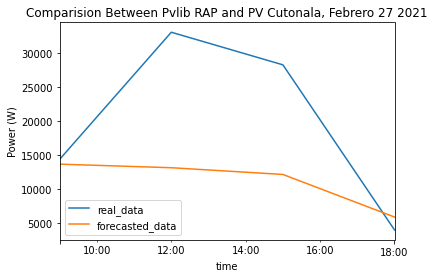

In [35]:
comparision.plot()
plt.ylabel('Power (W)')
plt.title('Comparision Between Pvlib %s and PV Cutonala, %s %s 2021' %(model_of_study, month, study_day));

### RMSE

$  RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}} $

In [36]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
import numpy as np

In [37]:
real = comparision['real_data']
real

time
2021-02-27 09:00:00-06:00    14379.33
2021-02-27 12:00:00-06:00    33042.33
2021-02-27 15:00:00-06:00    28254.33
2021-02-27 18:00:00-06:00     3999.67
Name: real_data, dtype: float64

In [38]:
forecasted = comparision['forecasted_data']
forecasted

time
2021-02-27 09:00:00-06:00    13662.741223
2021-02-27 12:00:00-06:00    13136.459670
2021-02-27 15:00:00-06:00    12149.677646
2021-02-27 18:00:00-06:00     5893.257787
Name: forecasted_data, dtype: float64

In [39]:
print("MSE:"+str(mean_squared_error(forecasted, real)))
print("RMSE:"+str(np.sqrt(mean_squared_error(forecasted, real))))
print("MSLE:"+str(mean_squared_log_error(forecasted, real)))
print("RMSLE:"+str(np.sqrt(mean_squared_log_error(forecasted, real))))
print("MAE:"+str(mean_absolute_error(forecasted, real)))

MSE:164925668.80502373
RMSE:12842.338914894892
MSLE:0.428919454912257
RMSLE:0.6549194262749098
MAE:9655.174812125808


In [40]:
MSE = mean_squared_error(forecasted, real)
RMSE = np.sqrt(mean_squared_error(forecasted, real))
MSLE = mean_squared_log_error(forecasted, real)
RMSLE = np.sqrt(mean_squared_log_error(forecasted, real))
MAE = mean_absolute_error(forecasted, real)

In [41]:
metrics_obj = {'MSE': [MSE], 'RMSE':[RMSE], 'MSLE':[MSLE], 'RMSLE':[RMSLE], 'MAE':[MAE]}
metrics_df = pd.DataFrame(metrics_obj)
metrics_df

,MSE,RMSE,MSLE,RMSLE,MAE
0,1.649257e+08,12842.338915,0.428919,0.654919,9655.174812


In [42]:
metrics_df.to_csv(metrics_data, index=False)